# `epidemic-intelligence` demo

In [1]:
# pip install --upgrade -i https://test.pypi.org/simple/ epidemic-intelligence;

In [2]:
pip show epidemic-intelligence

Name: epidemic-intelligence
Version: 0.4.7
Summary: A data visualization Python package to explore large-scale spatio-temporal simulation data.
Home-page: 
Author: 
Author-email: Elijah Sandler <sandler.e@northeastern.edu>
License: 
Location: C:\Users\elija\Documents\24f-coop\demovenv\Lib\site-packages
Requires: db-dtypes, epiweeks, google-cloud-bigquery, kaleido, matplotlib, pandas, plotly
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import epidemic_intelligence as ei
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd

## Creating a BigQuery client

In [4]:
credentials = service_account.Credentials.from_service_account_file('C:\\Users\\elija\\Documents\\24f-coop\\credentials.json')
project = 'net-data-viz-handbook'
# Initialize a GC client
client = bigquery.Client(credentials=credentials, project=project)

## Simplifying

In [5]:
table_name = 'importation_data.h1n1_proper' # str, name of bigquery table
destination = 'importation_data.h1n1_proper_simple' # str, name of place where simplified table will be stored

method = 'directional' # mbd, directional, mean, median, or ftvariance

# all ported over from above
source_column = 'source_basin' # str, name of col holding source ids
target_column = 'target_basin' # str, name of col holding target ids
value_column = 'importations' # str, name of col holding values
compartment_column = 'compartment' 

In [6]:
ei.summarize_runs?

Signature:
ei.summarize_runs(
    client,
    table_name,
    destination,
    method='median',
    source_column='source_basin',
    target_column='target_basin',
    value_column='importations',
    compartment_column='compartment',
)
Docstring: <no docstring>
File:      c:\users\elija\documents\24f-coop\demovenv\lib\site-packages\epidemic_intelligence\importation_processing.py
Type:      function

In [7]:
ei.summarize_runs(client,
                     table_name,
                     destination,
                     method,
                     source_column,
                     target_column,
                     value_column,
                     compartment_column
)

True

## Aggregating

In [36]:
table_name = 'importation_data.h1n1_proper_simple' # str, more than likely `destination` from last query
destination = 'importation_data.h1n1_proper_simple_agg' # str

# all ported over from above
source_column = 'source_basin' # str, name of col holding source ids
target_column = 'target_basin' # str, name of col holding target ids
value_column = 'importations' # str, name of col holding values

# date information
date = 'iso'

# compartment information
compartment_column = 'compartment' 
compartments = ['Infectious_Asymp', 'Infectious_SympT'] # list, or None to include all
new_compartment = 'Infectious' # str, or None

In [37]:
ei.aggregate_table(client=client,
                   table_name=table_name,
                   destination=destination,
                   source_column=source_column,
                   target_column=target_column,
                   value_column=value_column,
                   compartment_column=compartment_column,
                   compartments=compartments,
                   new_compartment=new_compartment,
                   date=date, 
                  )

In [ ]:
ei.aggregate_sir(
    client=client, 
    table_name='sri_data.SIR_0_basins_prevalence',
    destination='sri_data.SIR_0_basins_prevalence_agg',
    geo_column='basin_id', 
    value_columns=['Susceptible_18_23', 'Infectious_18_23'],
    date='iso'
)

## Importation Plots
### Area Plots

In [38]:
table_name = 'importation_data.h1n1_proper_simple_agg'
reference_table = 'reference.gleam-geo-map'
source_geo_level = 'continent_label'  # Geographic level for source filtering
target_geo_level = 'continent_label'        # Geographic level for target filtering
output_resolution = 'country_name'      # Geographic level for output

source_values = ['Asia']
target_values = ['Europe']      
domestic = False
cutoff = 0.05

In [46]:
fig = ei.area_plot(client=client, table_name=table_name, reference_table=reference_table,
                               source_geo_level=source_geo_level, target_geo_level=target_geo_level, output_resolution=output_resolution,
                               source_values=source_values, target_values=target_values, domestic=domestic, cutoff=cutoff, 
                               display='source', )

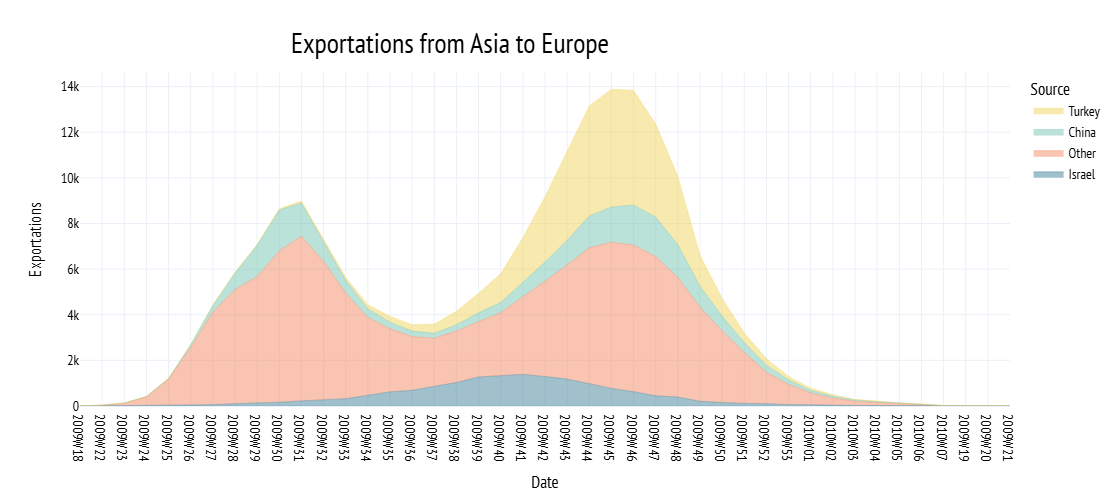

In [47]:
fig.update_layout(width=900, height=500, # dimensions
                  title_text = 'Exportations from Asia to Europe', # changing title
                  font_family = 'PT Sans Narrow'
                 )
fig.show()

### Sankey and Relative Risk

In [41]:
table_name = "net-data-viz-handbook.importation_data.h1n1_proper_simple_agg"
reference_table = 'reference.gleam-geo-map'

source_geo_level = "continent_label"  # This could also be "region_id" or other levels
source_values = ['Asia']  
source_resolution = "country_name"

target_geo_level = "continent_label"  # Could be "country_id", "region_label", etc.
target_values = ["Europe"]  # Regions to filter on
target_resolution = 'region_label'

date_range = ["2009W40", "2009W43"]  # The date range for the data
cutoff = 0.08  # Threshold for categorizing regions
domestic = True

In [42]:
sfig = ei.sankey(client=client, table_name=table_name, reference_table=reference_table, 
                                                source_geo_level=source_geo_level, target_geo_level=target_geo_level, 
                                                source_values=source_values, target_values=target_values, 
                                                source_resolution=source_resolution, target_resolution=target_resolution,
                                                date_range=date_range, cutoff=cutoff, domestic=domestic, n_sources=5, n_targets=None)
sfig

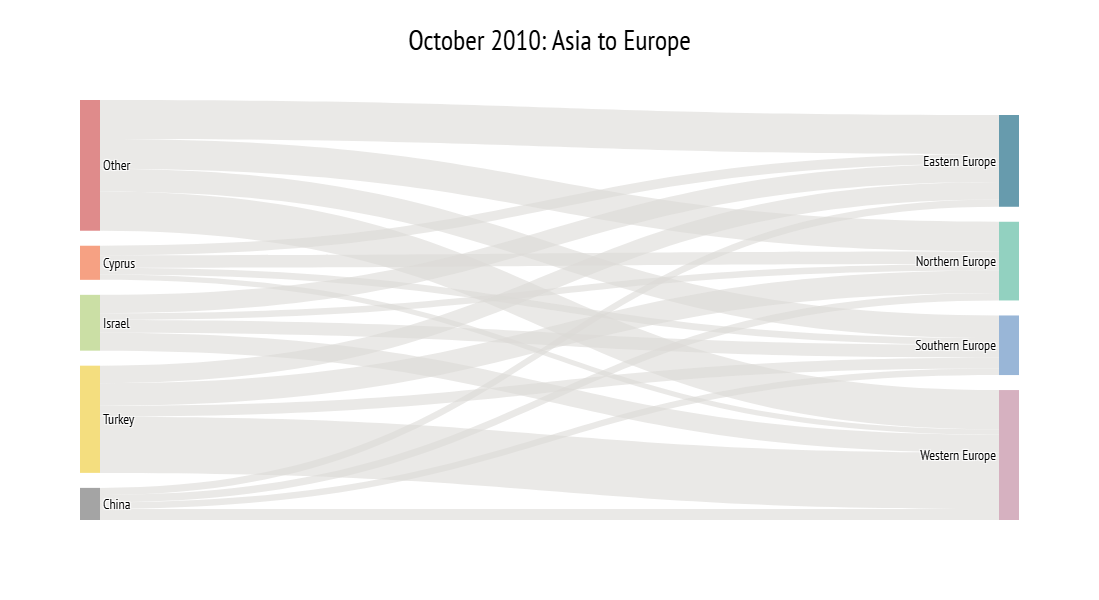

In [49]:
sfig.update_layout(width=400, height=600, font_family='PT Sans Narrow', title='October 2010: Asia to Europe')
# sfig.write_image("../handbook/images/sample_sankey_plot.png", scale=3) 
sfig

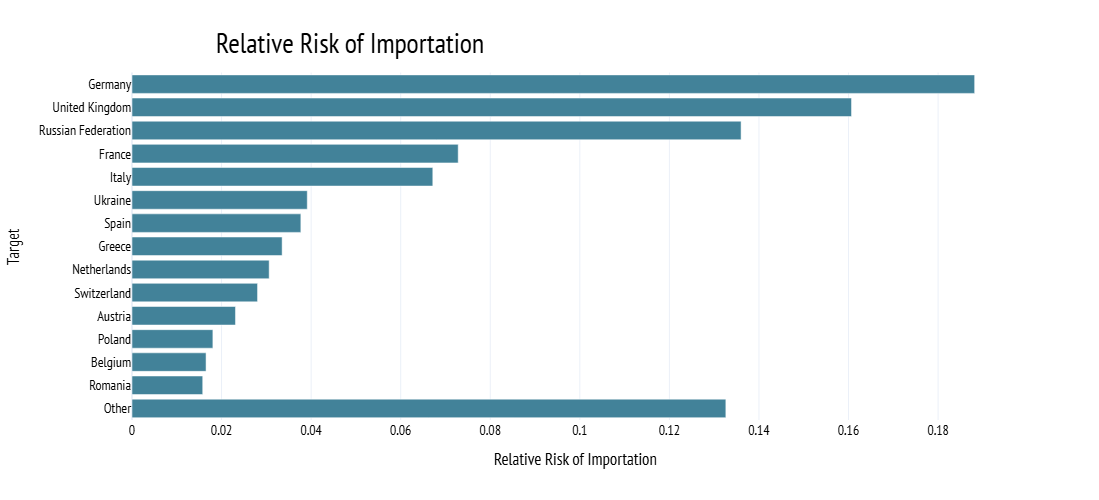

In [50]:
fig = ei.relative_risk(client, table_name, reference_table, source_geo_level, 
                                target_geo_level, source_values, target_values, 
                                date_range=date_range, cutoff=0.0, n=15, 
                                output_resolution='country_name', domestic=True, )
fig.update_layout(width=700, height=500, font_family='PT Sans Narrow')
fig

## Boxplots
### Fixed-time

In [17]:
ei.fixed_time_boxplot?

Signature:
ei.fixed_time_boxplot(
    client,
    table_name,
    reference_table,
    geo_level,
    geo_values,
    geo_column='basin_id',
    reference_column='basin_id',
    num_clusters=1,
    num_features=10,
    grouping_method='mse',
    value='value',
    dataset=None,
    delete_data=True,
    kmeans_table=False,
    overwrite=False,
    confidence=0.9,
    full_range=False,
    outlying_points=True,
)
Docstring: <no docstring>
File:      c:\users\elija\documents\24f-coop\demovenv\lib\site-packages\epidemic_intelligence\boxplots.py
Type:      function

In [75]:
# required
table_name = 'sri_data.SIR_0_basins_prevalence_agg'
reference_table = 'reference.gleam-geo-map'
reference_column = 'basin_id'

geo_column = 'basin_id'
geo_level = 'basin_label' # default to org_geography
geo_values = 'Portland(US-ME)' # default to None
value = 'Infectious_18_23'
confidence=.95

# Set parameters for grouping
num_clusters = 1  # Example number of clusters, defaults to 1
num_features = 20   # Set the number of features to select, defaults to 10?
grouping_method = 'mse' # 'mse' or 'abc', defaults to 'mse'
centrality_method = 'mse' # 'mse', 'abc', or 'mbd', defaults to 'mbd'

dataset = None # defaults to None
delete_data = True # defaults to True

In [63]:
fig = ei.fixed_time_boxplot(
    client,
    table_name,
    reference_table,
    geo_level,
    geo_values,
    geo_column=geo_column,
    reference_column=reference_column,
    num_clusters=num_clusters,
    num_features=num_features,
    grouping_method=grouping_method,
    value=value,
    dataset=dataset,
    delete_data=delete_data,
    kmeans_table=False,
    confidence=confidence,
    full_range=True,
    outlying_points=False,
)


Dataset `net-data-viz-handbook.709bd8e79c3a8531dc868a892c4a0217d080af0f43d0da8f0b603b70918a0980` created.
BigQuery dataset `net-data-viz-handbook.709bd8e79c3a8531dc868a892c4a0217d080af0f43d0da8f0b603b70918a0980` removed successfully, or it did not exist.


In [64]:
fig.update_layout(width=900, height=500, showlegend=True, font_family='PT Sans Narrow', title='Susceptibility in Portland, ME',)
fig.update_layout(showlegend=True)

In [65]:
df_ft = ei.boxplots.fetch_fixed_time_quantiles(
    client=client,
    table_name=table_name,
    reference_table=reference_table,
    confidences=[.9, .5],
    geo_level=geo_level,
    geo_values=geo_values,
    geo_column=geo_column,
    reference_column=reference_column,
    num_clusters=num_clusters,
    num_features=num_features,
    grouping_method=grouping_method,
    value=value,
    dataset=dataset,
    delete_data=delete_data,
    kmeans_table=False,
)
df_ft

Dataset `net-data-viz-handbook.2ea4903fb8e49bae52a362987e7390e779fa87d86a4dae540ad00b6d8f076fad` created.
BigQuery dataset `net-data-viz-handbook.2ea4903fb8e49bae52a362987e7390e779fa87d86a4dae540ad00b6d8f076fad` removed successfully, or it did not exist.


,CENTROID_ID,date,median,perc05,perc95,perc25,perc75
0,1,2009W08,0.0,0.0,0.0,0.0,0.0
1,1,2009W09,0.0,0.0,0.0,0.0,0.0
2,1,2009W10,0.0,0.0,0.0,0.0,0.0
3,1,2009W11,0.0,0.0,0.0,0.0,0.0
4,1,2009W12,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1963,1,2010W07,27.0,3.0,72.6,16.0,46.0
1964,1,2010W07,27.0,3.0,72.6,16.0,46.0
1965,1,2010W07,27.0,3.0,72.6,16.0,46.0
1966,1,2010W07,27.0,3.0,72.6,16.0,46.0


## Spaghetti plot

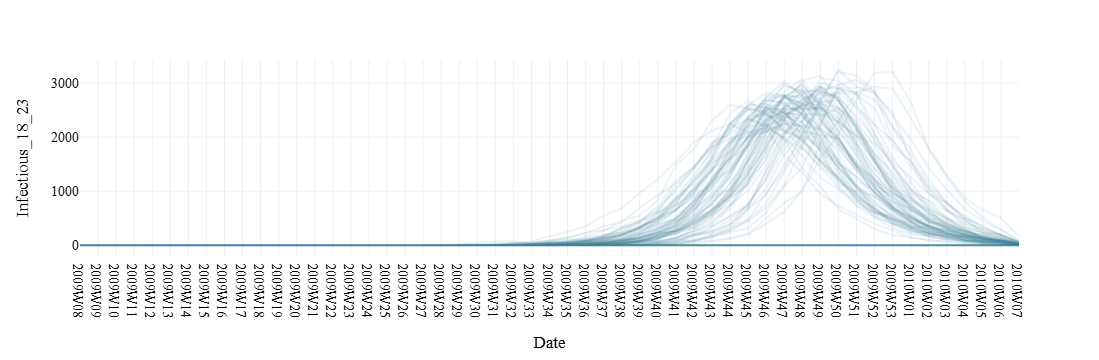

In [67]:
ei.spaghetti_plot(
    client=client,
    table_name=table_name,
    reference_table=reference_table,
    geo_level=geo_level,
    geo_values=geo_values,
    geo_column=geo_column,
    reference_column=reference_column,
    value=value,
    n=100, 
)

## Functional

In [78]:
ffig = ei.functional_boxplot(
    client,
    table_name,
    reference_table,
    geo_level,
    geo_values,
    geo_column=geo_column,
    reference_column=reference_column,
    value=value,
    num_clusters=2,
    num_features=num_features,
    grouping_method=grouping_method,
    kmeans_table=False,
    centrality_method=centrality_method,
    threshold=1.5,
    dataset=None,
    delete_data=True,
)

Dataset `net-data-viz-handbook.70a32d7b3d7003aa25b69e1fa5696f3ef118a491ea9c71f6cae7e44dfab9aaf9` created.
BigQuery dataset `net-data-viz-handbook.70a32d7b3d7003aa25b69e1fa5696f3ef118a491ea9c71f6cae7e44dfab9aaf9` removed successfully, or it did not exist.


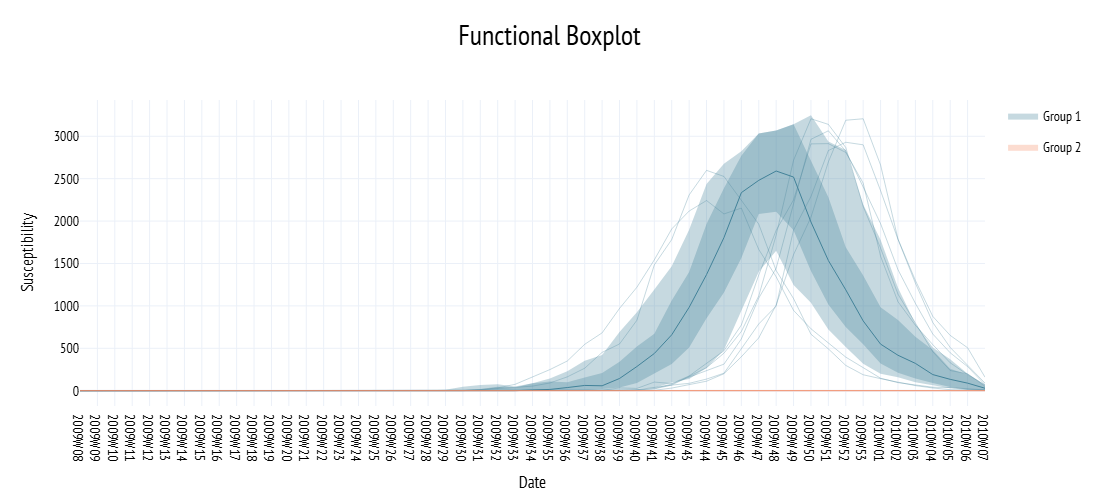

In [79]:
ffig.update_layout(width=900, height=500, showlegend=True, font_family='PT Sans Narrow', title='Functional Boxplot', yaxis_title='Susceptibility')